In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [2]:
measurements = [
    {
    'observable': '$A_{\Gamma}$',
    'current':  [{'label': 'LHCb KK', 'uncty': 3e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb $\pi\pi$', 'uncty': 6e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb avg.', 'uncty': 2.8e-4, 'faint': False, 'external': False},
                 {'label': 'HFLAV WA', 'uncty': 2.8e-4, 'faint': False, 'external': True},],
    'medium':   [{'label': 'LHCb avg.', 'uncty': 1e-4, 'faint': False, 'external': False},
                 {'label': 'Belle II', 'uncty': 3.5e-4, 'faint': False, 'external': True},],   
    'ultimate': [{'label': 'LHCb avg.', 'uncty': 3e-5, 'faint': False, 'external': False},],   
},
    {
    'observable': '$A_{\Gamma} 2$',
    'current':  [{'label': 'LHCb KK', 'uncty': 3e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb $\pi\pi$', 'uncty': 6e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb avg.', 'uncty': 2.8e-4, 'faint': False, 'external': False},
                 {'label': 'HFLAV WA', 'uncty': 2.8e-4, 'faint': False, 'external': True},],
    'medium':   [{'label': 'LHCb avg.', 'uncty': 1e-4, 'faint': False, 'external': False},
                 {'label': 'Belle II', 'uncty': 3.5e-4, 'faint': False, 'external': True},],   
    'ultimate': [{'label': 'LHCb avg.', 'uncty': 3e-5, 'faint': False, 'external': False},],   
},
    {
    'observable': '$A_{\Gamma} 3$',
    'current':  [{'label': 'LHCb KK', 'uncty': 3e-4, 'faint': True, 'external': False},
                 {'label': 'HFLAV WA', 'uncty': 2.8e-4, 'faint': False, 'external': True},],
    'medium':   [{'label': 'LHCb avg.', 'uncty': 1e-4, 'faint': False, 'external': False},
                 {'label': 'Belle II', 'uncty': 3.5e-4, 'faint': False, 'external': True},],   
    'ultimate': [{'label': 'LHCb avg.', 'uncty': 3e-5, 'faint': False, 'external': False},],   
},

    {
    'observable': '$A_{\Gamma} 4$',
    'current':  [{'label': 'LHCb KK', 'uncty': 3e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb $\pi\pi$', 'uncty': 6e-4, 'faint': True, 'external': False},
                 {'label': 'another LHCb', 'uncty': 6e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb avg.', 'uncty': 2.8e-4, 'faint': False, 'external': False},
                 {'label': 'HFLAV WA', 'uncty': 2.8e-4, 'faint': False, 'external': True},],
    'medium':   [{'label': 'LHCb avg.', 'uncty': 1e-4, 'faint': False, 'external': False},
                 {'label': 'Belle II', 'uncty': 3.5e-4, 'faint': False, 'external': True},],   
    'ultimate': [{'label': 'LHCb avg.', 'uncty': 3e-5, 'faint': False, 'external': False},],   
},


]

In [3]:
colLHCb = 'k'           # colour for LHCb measurements
colExt = 'tab:purple'   # colour for non-LHCb measurements
nominalWidth = 3        # width for main measurements
faintWidth = 1          # width for individual measurements contributing to main

def ceilOOM(x):
    # round to next smaller order or magnitue
    return np.floor(np.log10(x))

def printError(x):
    power = np.floor(np.log10(x))
    return r'$\pm {%.1f}\times 10^{%d}$'%(x/(10**power),int(power))

# fonts
plt.rcParams.update({'font.size': 16,'legend.fontsize': 16})#, 'xtick.labelsize':24})
font1 = {'family' : 'sans-serif',
        'color'  : 'k',
        'weight' : 'normal',
        'size'   : 18,
       }

font2 = {'family' : 'sans-serif',
        'color'  : '#2F6B9A',
        'weight' : 'normal',
        'size'   : 18,
       }

font3 = {'family' : 'sans-serif',
        'color'  : 'k',
        'weight' : 'normal',
        'size'   : 42,
       }

font4 = {'family' : 'sans-serif',
        'color'  : 'k',
        'weight' : 'normal',
        'size'   : 34,
       }

def draw_background(a):
    # draw background colouring
    a.fill([0.5,0.5,1.5,1.5],[nult+nmed+2,height,height,nult+nmed+2],fill=True,facecolor='#D1E6F7',linewidth=0,zorder=1)
    a.fill([0.5,0.5,1.5,1.5],[nult+nmed+2,nult+1,nult+1,nult+nmed+2],fill=True,facecolor='#A5C8E6',linewidth=0,zorder=1)
    a.fill([0.5,0.5,1.5,1.5],[0,nult+1,nult+1,0],fill=True,facecolor='#77A4CA',linewidth=0,zorder=1)
    a.plot([0.5,1.5], [nult+1]*2, '-',color='#336793',linewidth=1)
    a.plot([0.5,1.5], [nult+nmed+2]*2, '-',color='#336793',linewidth=1)

def prep_axes(a,height):
    # prepare axes
    a.set_xlim(0.5,1.5)
    a.set_ylim(0,height)
    a.yaxis.set_tick_params(labelleft=False)
    a.xaxis.set_tick_params(labelbottom=False)
    a.set_xticks([])
    a.set_yticks([])

def draw_measurements(meas,xrange,offset):
    # draw line, label, and uncertainty
    totm = len(meas)
    for item,i in zip(meas,range(totm)):
        sigma = item['uncty']
        size = sigma*0.5/xrange
        c = colLHCb
        if item['external']: c = colExt
        w = nominalWidth
        if item['faint']: w = faintWidth
        a.plot([1.-size,1.+size], [totm-i+offset]*2, '-',color=c,linewidth=w)
        a.text(1.01, totm-i+offset+0.05, printError(sigma),fontdict=font1,ha='left',va='bottom',zorder=2)
        a.text(0.99, totm-i+offset+0.05, item['label'],fontdict=font1,ha='right',va='bottom',zorder=2)

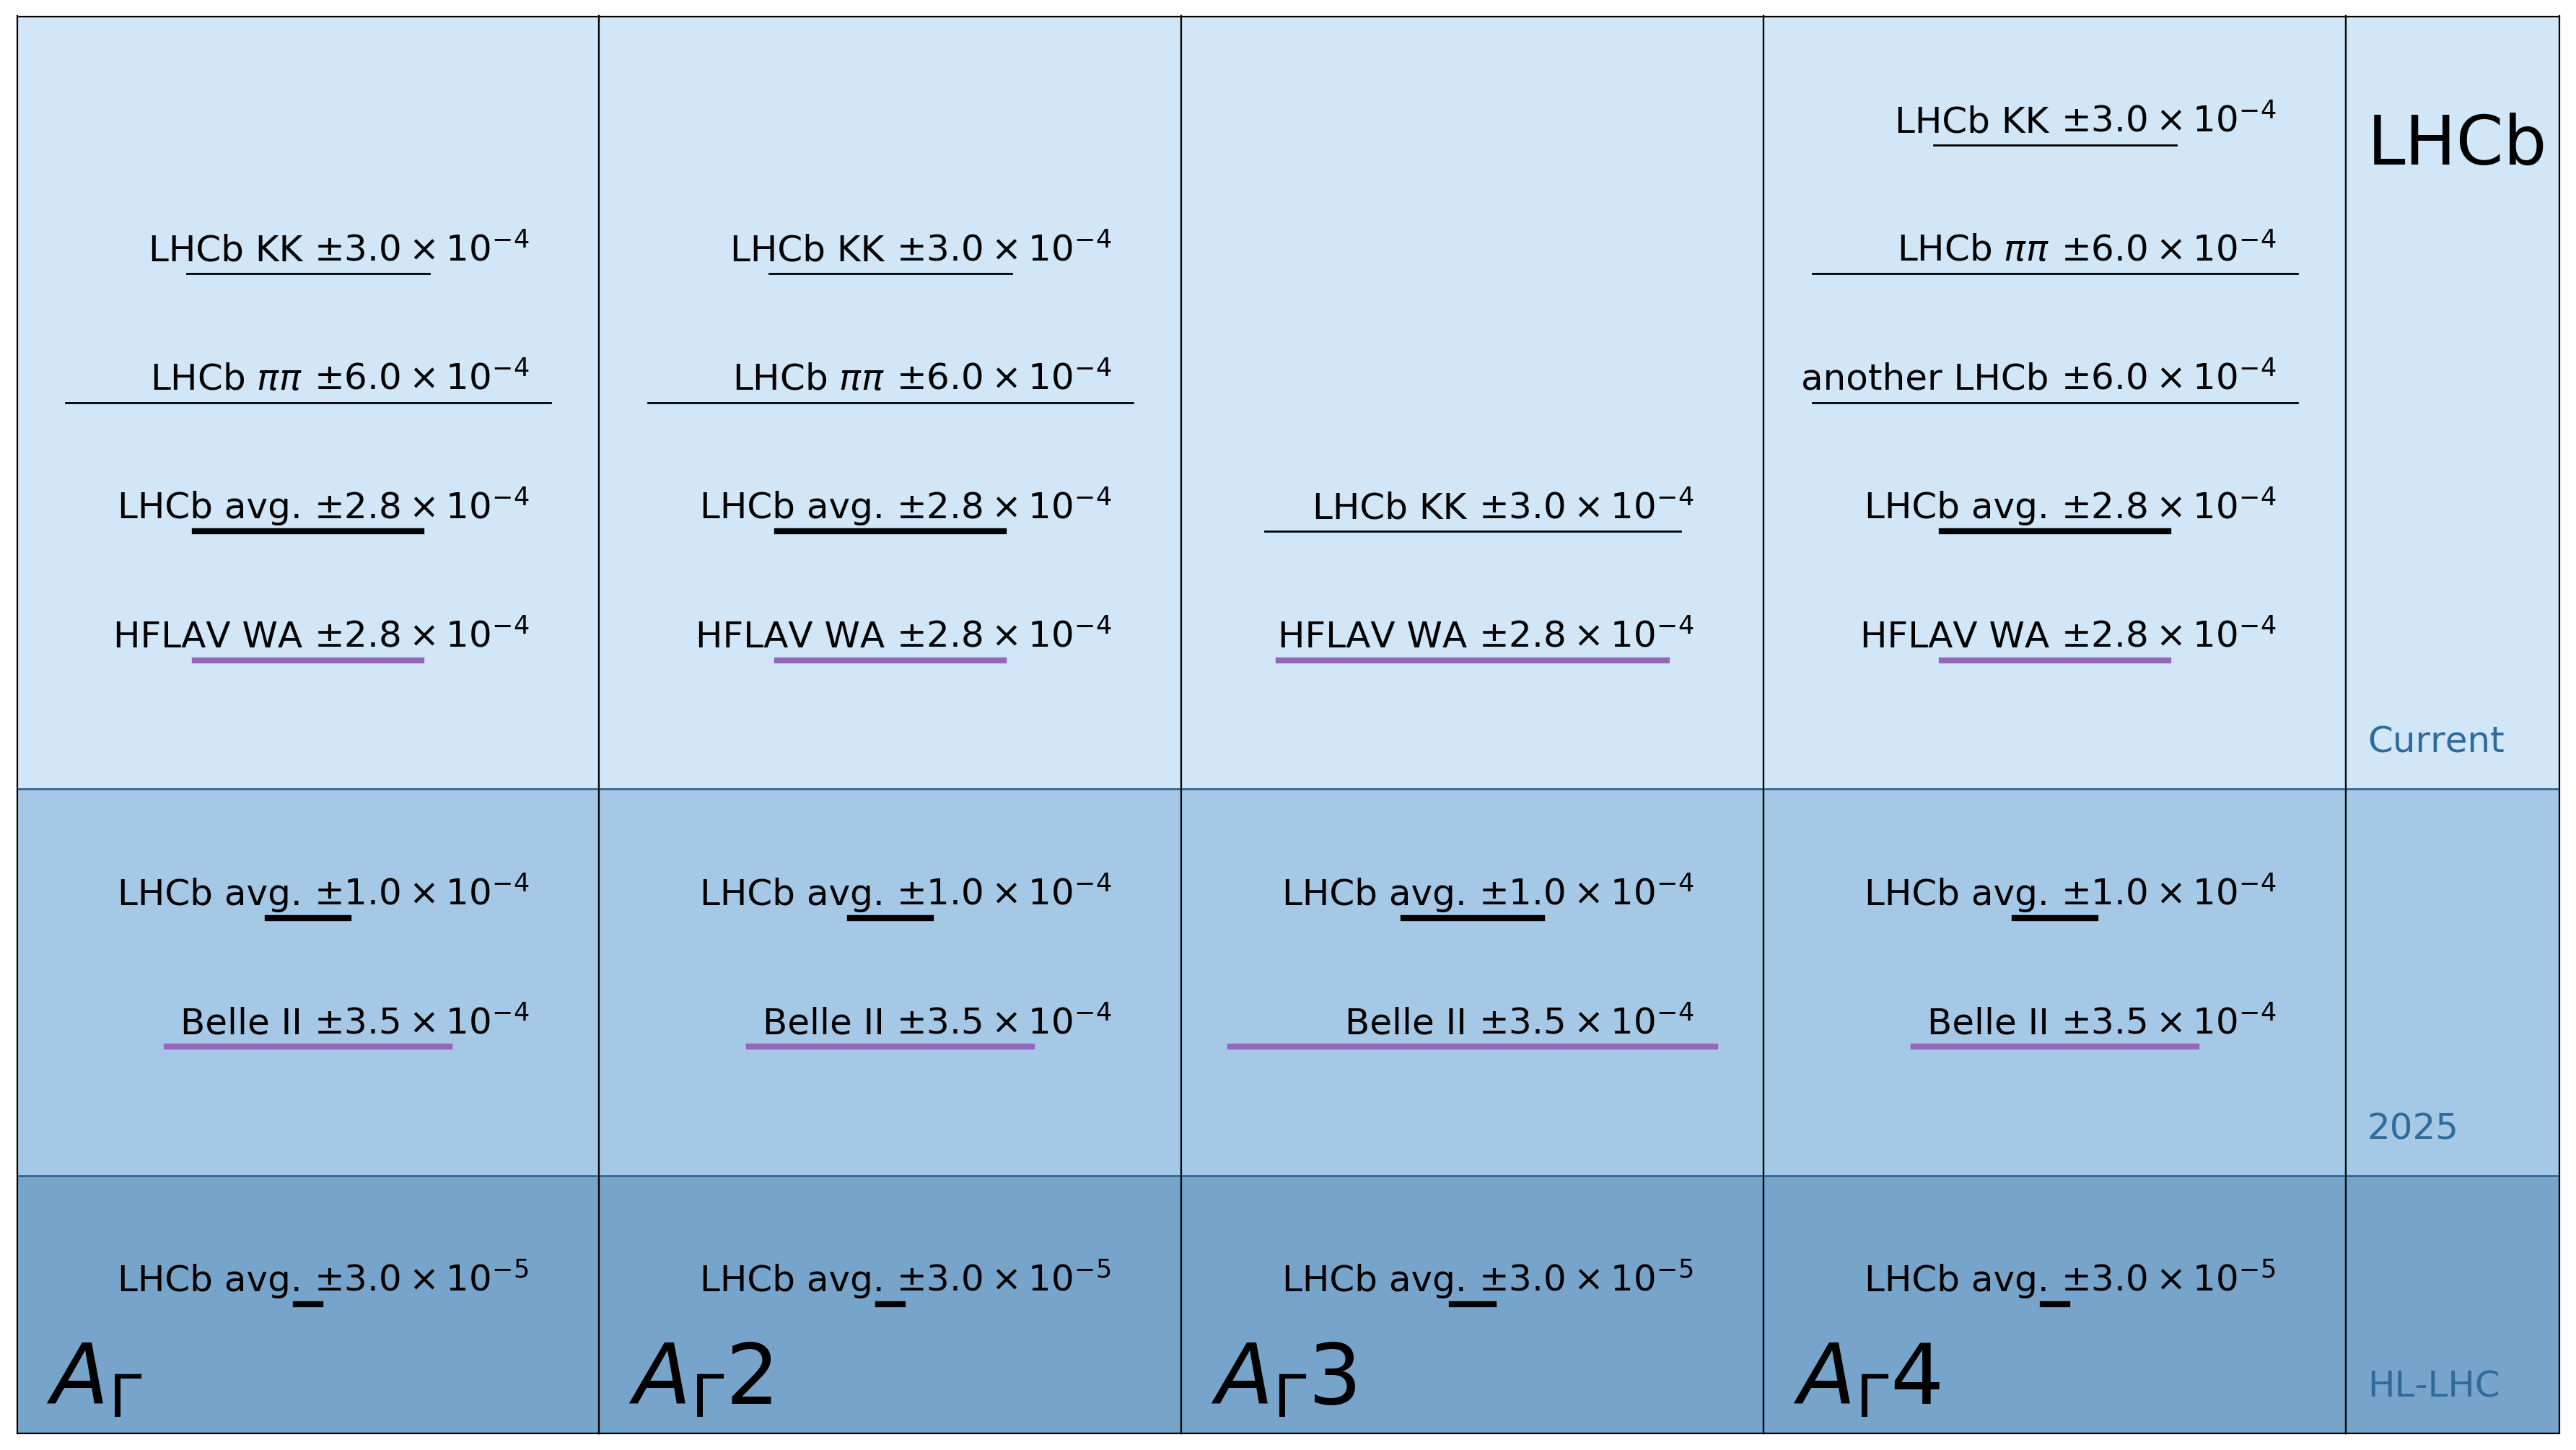

In [4]:
# work out the maximum number of observables and from it the total height
nbins = len(measurements)
ncur = nmed = nult = 0
for m in measurements:
    ncur = max(ncur,len(m['current']))
    nmed = max(nmed,len(m['medium']))
    nult = max(nult,len(m['ultimate']))
height = ncur+nmed+nult+3

# prepare different pads for observables and side bar
fig = plt.figure(figsize = (nbins*5+1.83+0.9,height+2),dpi=200) # width per measurement = 5, width side bar = 1.83, padding = 0.9
ratios = [5]*nbins
ratios.append(1.83)
gs1 = gridspec.GridSpec(1,nbins+1,width_ratios=ratios)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

# loop over observables and plot
for m,n in zip(measurements,range(nbins)):
    # prepare plot and print observable in bottom left
    a = plt.subplot(gs1[n])
    prep_axes(a,height)
    draw_background(a)
    a.text(0.55,0.1,m['observable'],fontdict=font3,ha='left',va='bottom',zorder=2)

    # determine largest uncertainty to get scale
    maxuncty = 0.
    for item in m['current']+m['medium']+m['ultimate']:
        maxuncty = max(maxuncty,item['uncty'])
    xrange = 1.2 * maxuncty

    # draw three groups of measurements
    draw_measurements(m['ultimate'],xrange,0)
    draw_measurements(m['medium'],xrange,nult+1)
    draw_measurements(m['current'],xrange,nult+1+nmed+1)

# Add bar with labels on the right    
aDeco = plt.subplot(gs1[-1])
prep_axes(aDeco,height)
draw_background(aDeco)
aDeco.text( 0.6, nult+1+nmed+1.5, 'Current',fontdict=font2,ha='left',va='top')
aDeco.text( 0.6, 0.5, 'HL-LHC',fontdict=font2,ha='left',va='top')
aDeco.text( 0.6, nult+1.5, '2025',fontdict=font2,ha='left',va='top')
aDeco.text( 0.6, height-1, 'LHCb',fontdict=font4,ha='left',va='center')

plt.savefig('output.png', bbox_inches='tight')
plt.savefig('output.pdf', bbox_inches='tight')
plt.show()
